<a href="https://colab.research.google.com/github/cartika/Global-terrorism-analysis-EDA-/blob/main/GLOBAL_TERRORISM_ANALYSIS(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.
Explore and analyze the data to discover key findings pertaining to terrorist activities.**



# **GLOBAL TERRORISM ANALYSIS ( CONTENTS )**


---


*   IMPORTING LIBRARIES
*   LOADING AND VIEWING DATA
*   DROPPING COLUMNS WITH MOST NULL VALUES
*   TERROR-STRUCK AREAS IN MAP
*   HIGHLIGHTS
*   TERRORIST ACTIVITIES YEAR-WISE
*   MOST AFFECTED COUNTRIES
*   TERRORIST ACTIVITIES REGION-WISE
*   PEOPLE KILLED IN TERRORIST ATTACKS YEAR-WISE
*   RATIO B/W ATTACKS AND DEATHS
*   PEOPLE KILLED REGION-WISE
*   MOST COMMON ATTACK METHODS
*   TERRORIST GROUPS WITH HIGHEST NO OF ATTACKS
*   AFFECTED GROUPS OF PEOPLE
*   COMMON USED WEAPONS
*   MOST AFFECTED CITIES
*   COMMON TARGET GROUPS
*   SUMMARY









#**IMPORTING IMPORTANT LIBRARIES**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from wordcloud import WordCloud, STOPWORDS
from scipy import signal

#**LOADING AND VIEWING DATA**

In [2]:
#load csv-file
global_terrorism_data = pd.read_csv('/content/drive/MyDrive/Global Terrorism Analysis/Global Terrorism Data.csv',encoding='ISO-8859-1')
global_terrorism_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#getting no of rows and columns of data
global_terrorism_data.shape

(181691, 135)

#**DROPPING COLUMNS WITH MOST NULL VALUES**


In [4]:
#dropping columns with null values more than 40%
global_terrorism_data = global_terrorism_data.dropna(thresh=.60*181691, axis=1)

In [5]:
global_terrorism_data.shape

(181691, 58)

In [6]:
global_terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

#**DECODING FEATURES**
*  'iyear' : year of attack
*  'imonth' : month of attack
*  'iday' : day of attack
*  'country_txt : country
*  'region_txt' : region
*  'latitude' and 'longitude' : cordinates of area that was attacked
*  'summary' : brief description of what happened
*  'attacktype1_txt' : means of attack
*  'targettype1_txt' : groups of people that were targeted
*  'weaptype1' : kinds of weapons used
*  'nkill' : no of people killed in attack
*  'nwound' : no of wounded people

#**HIGHLIGHTS**



In [7]:
print('\n\n\n')
print('HIGHLIGHTS')
print('*********************\n')
print('Country with Highest number of Terrorist Attacks  :',global_terrorism_data['country_txt'].value_counts().index[0])
print('Regions with Highest number of Terrorist Attacks  :',global_terrorism_data['region_txt'].value_counts().index[0])
print('Max number of people killed in an attack are      :',global_terrorism_data['nkill'].max())
print('A total number of attacked cities                 :' , global_terrorism_data.city.nunique())
print('total no of terrorisr groups that attacked cities :',global_terrorism_data.gname.nunique())
print('Most Attack Types                                 :',global_terrorism_data['attacktype1_txt'].value_counts().idxmax())
print('\n*********************')

print('\n\n\n')






HIGHLIGHTS
*********************

Country with Highest number of Terrorist Attacks  : Iraq
Regions with Highest number of Terrorist Attacks  : Middle East & North Africa
Max number of people killed in an attack are      : 1570.0
A total number of attacked cities                 : 36674
total no of terrorisr groups that attacked cities : 3537
Most Attack Types                                 : Bombing/Explosion

*********************






#**TERROR-STRUCK AREAS IN MAP**

In [8]:
import plotly.express as px
#plotting worldmap with lattitude and longitudes

terror_map = global_terrorism_data.head(10000)
terror_map = terror_map[['latitude','longitude']]
fig = px.scatter_geo(terror_map, lat='latitude', lon='longitude')

fig.show()

#**TERRORIST ACTIVITIES YEAR-WISE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



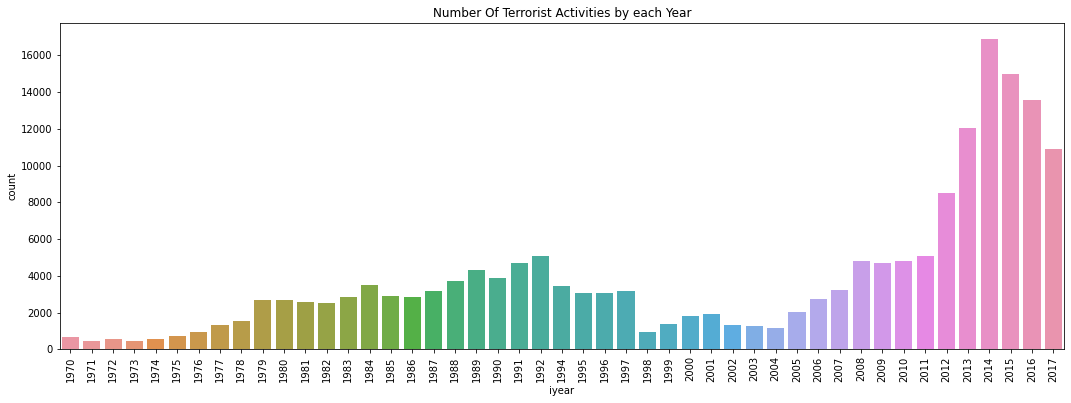

In [9]:
plt.subplots(figsize=(18,6))
sns.countplot('iyear',data=global_terrorism_data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by each Year')
plt.show()

We can see that from above plot that terror attacks are rising every year but had a downfall between year 2000 - 2005 and again a surge after that

# **MOST AFFECTED COUNTRIES** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



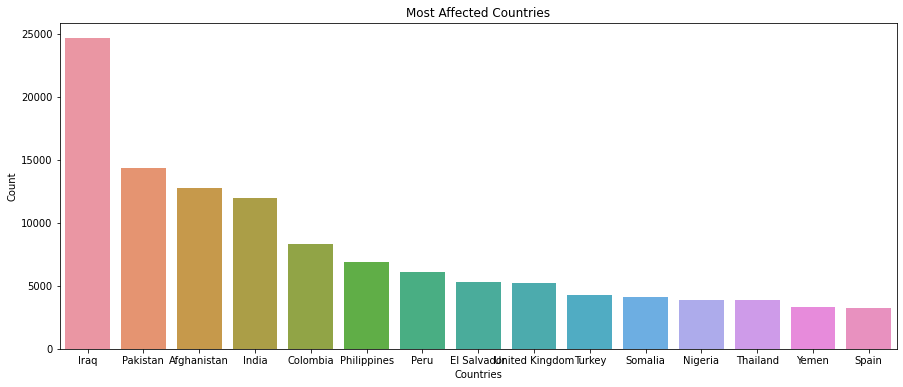

In [10]:
plt.subplots(figsize=(15,6))
sns.barplot(global_terrorism_data['country_txt'].value_counts()[:15].index,global_terrorism_data['country_txt'].value_counts()[:15].values)
plt.title('Most Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

#**TERRORIST ACTIVITIES REGION-WISE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



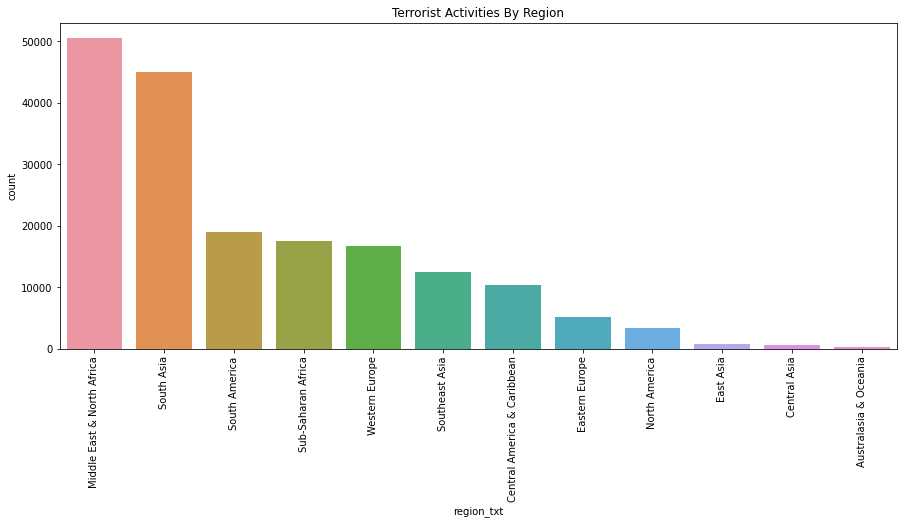

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=global_terrorism_data,order=global_terrorism_data['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorist Activities By Region')
plt.show()

Text(0.5, 1.0, 'top 10 terror struck cities')

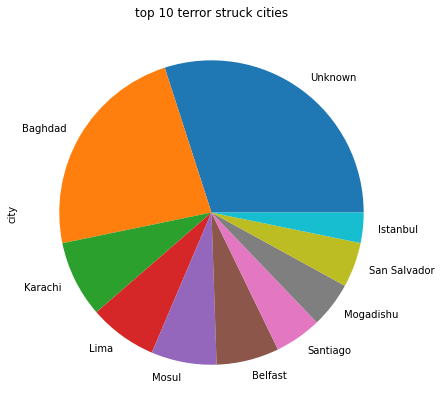

In [12]:


city_terrror=global_terrorism_data.city.value_counts()[:10]
ax=plt.subplots(figsize=(15,7))
ax=city_terrror.plot(kind='pie')
ax.set_title("top 10 terror struck cities")

#**PEOPLE KILLED IN TERRORIST ATTACKS YEAR-WISE**

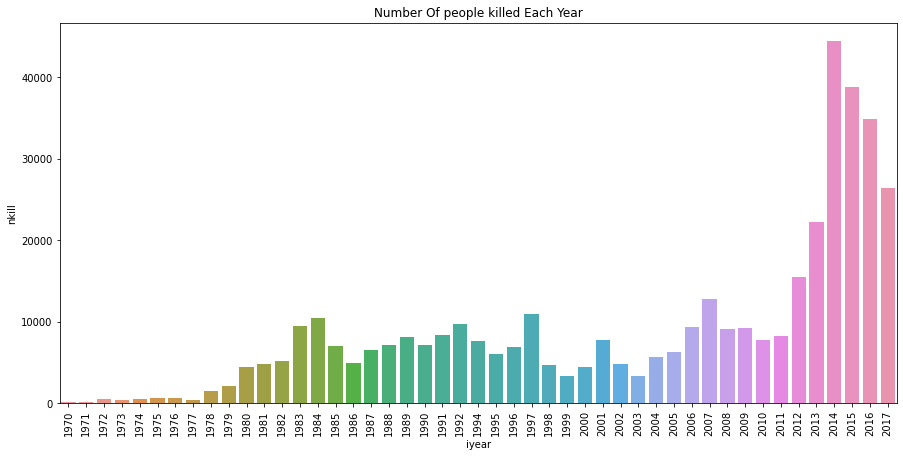

In [13]:
plt.subplots(figsize=(15,7))

#grouping data of killed ppl
killed = global_terrorism_data.groupby('iyear').nkill.sum().to_frame().reset_index()
killed.columns = ['iyear','nkill']
sns.barplot(x=killed.iyear, y=killed.nkill)
plt.xticks(rotation=90)
plt.title('Number Of people killed Each Year')
plt.show()

#**RATIO B/W ATTACKS AND DEATHS**

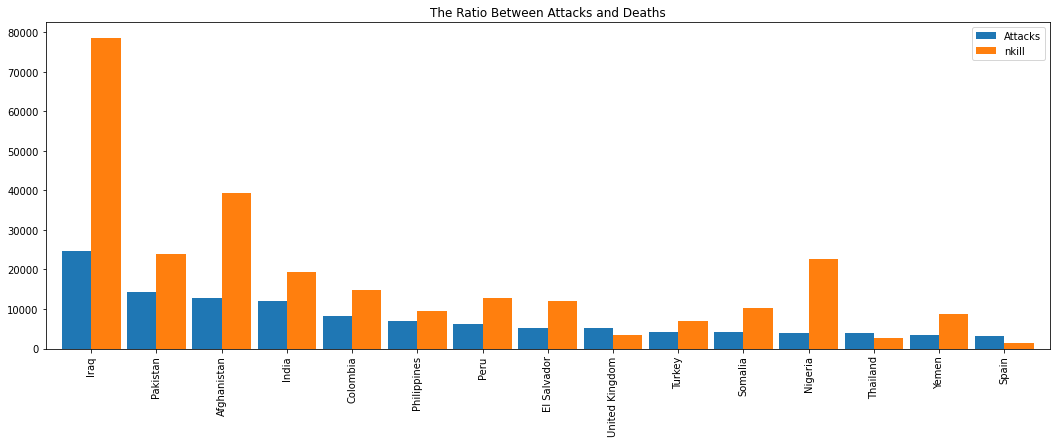

In [14]:
coun_terror=global_terrorism_data['country_txt'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=global_terrorism_data.groupby('country_txt')['nkill'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.title("The Ratio Between Attacks and Deaths")
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

#**PEOPLE KILLED REGION-WISE**

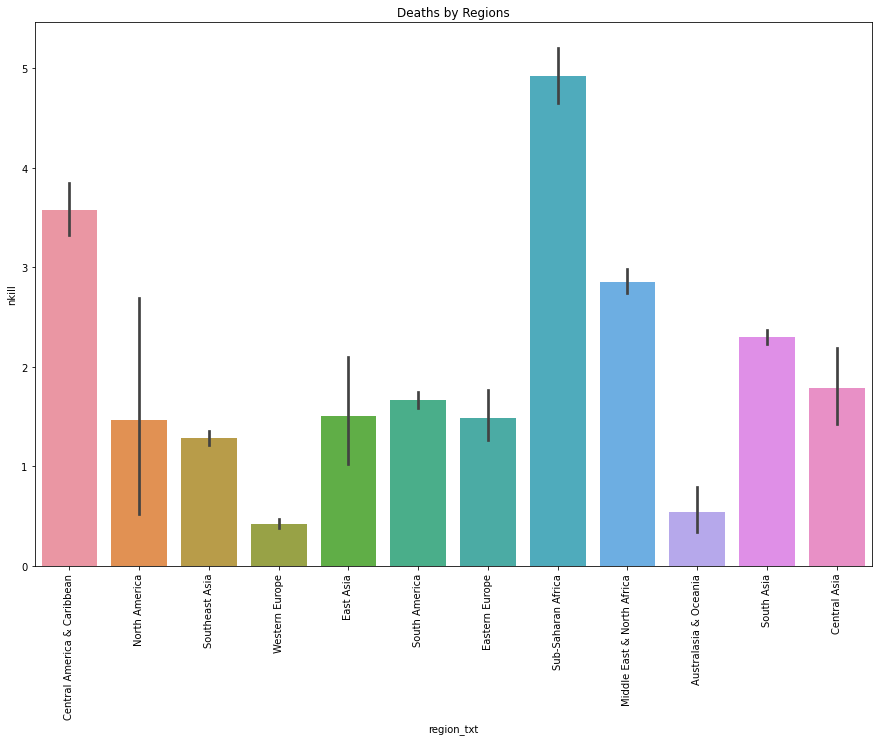

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'region_txt', y = 'nkill', data = global_terrorism_data)
plt.xticks(rotation = 90)
plt.title('Deaths by Regions')
plt.show()

#**MOST COMMON ATTACK METHODS**

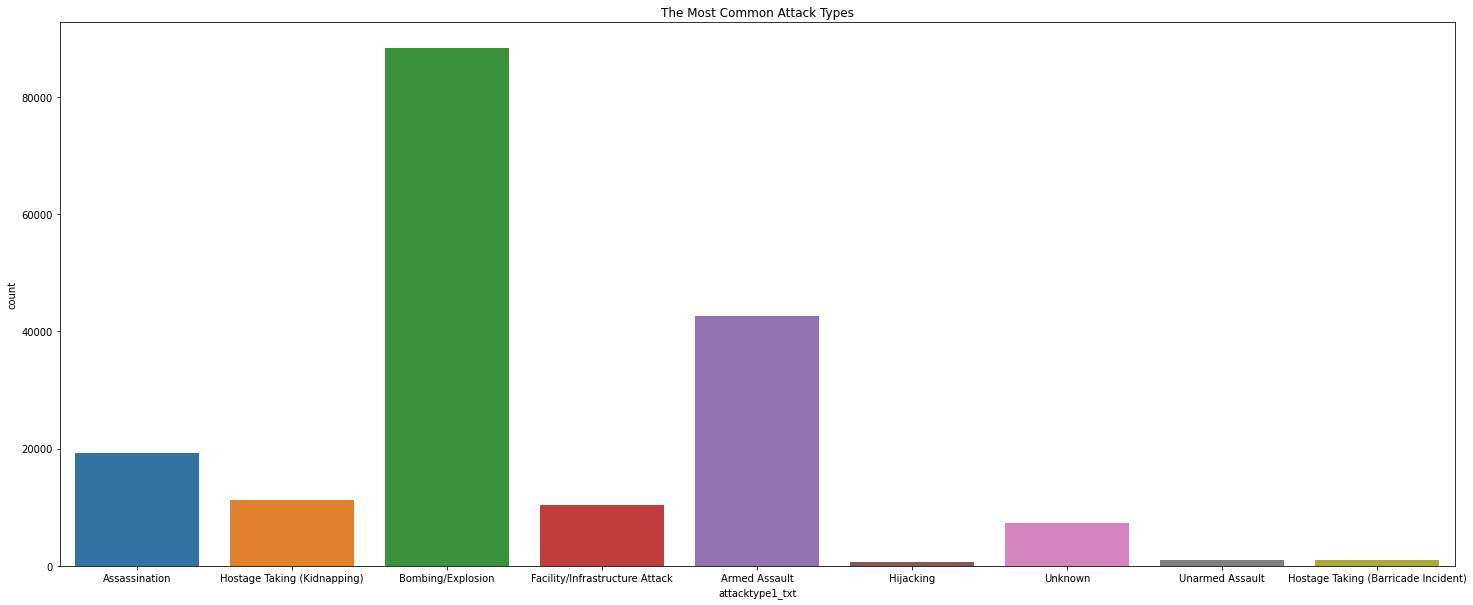

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x = 'attacktype1_txt', data = global_terrorism_data)
plt.title("The Most Common Attack Types")
plt.show()

#**TERRORIST GROUPS WITH HIGHEST NO OF ATTACKS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



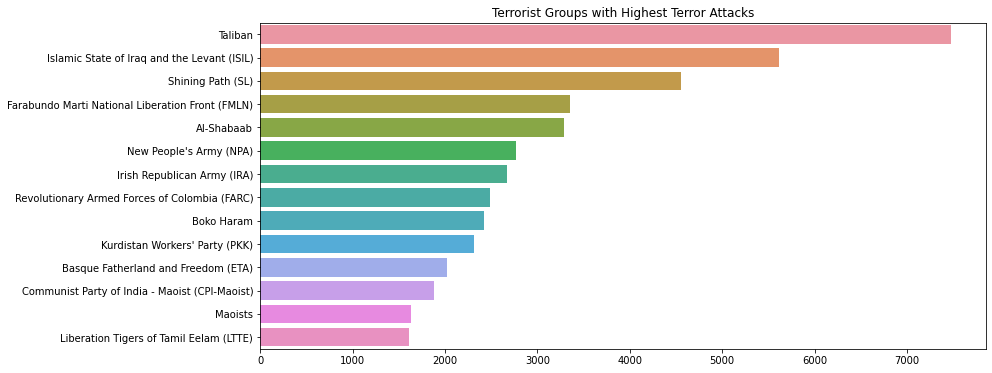

In [17]:
sns.barplot(global_terrorism_data['gname'].value_counts()[1:15].values,global_terrorism_data['gname'].value_counts()[1:15].index)
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()


#**AFFECTED GROUPS OF PEOPLE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



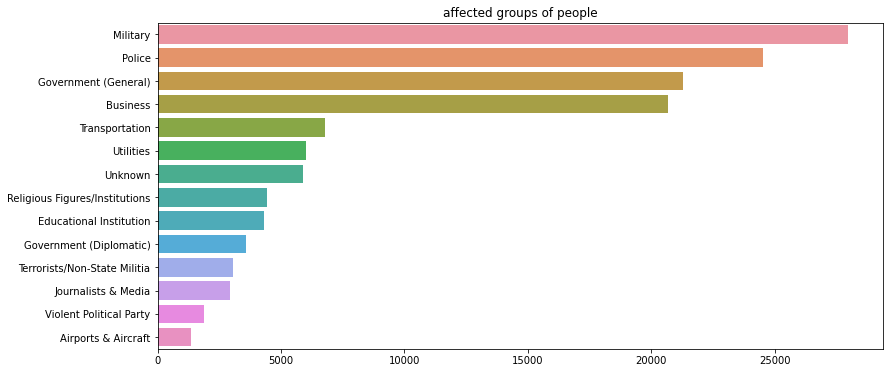

In [18]:
sns.barplot(global_terrorism_data['targtype1_txt'].value_counts()[1:15].values,global_terrorism_data['targtype1_txt'].value_counts()[1:15].index)
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.title('affected groups of people')
plt.show()


#**COMMON USED WEAPONS**

In [19]:
weapons = global_terrorism_data['weaptype1_txt'].value_counts()
weapons = DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon used', 'Weapon Count']
weapons

,Weapon used,Weapon Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


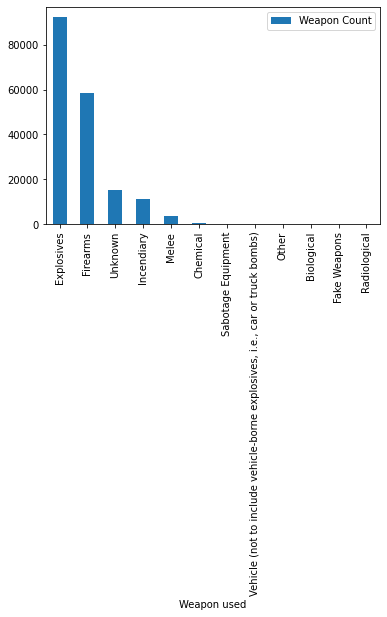

In [20]:
weapons.plot.bar(x='Weapon used', y='Weapon Count')

#**MOST AFFECTED CITIES**

In [21]:
#getting count of cities
city_count= global_terrorism_data.city.value_counts()

city_count.drop(axis=1, index='Unknown', inplace=True)

#arranging data in dataframe of city-counts
city_count =city_count.reset_index()
city_count.rename(columns={'index':'city','city':'attackcount'}, inplace= True)
city_count.sort_values(by=['attackcount'],ascending=False,  inplace= True)
top_target_cities = city_count.head(100)
top_target_cities

index =0;

df_city = global_terrorism_data[['city','country_txt']]
print(df_city.shape)
df_city.drop_duplicates(inplace= True)
print(df_city.shape)



affected_cities = top_target_cities.merge(df_city, left_on = 'city', right_on = 'city',  how = 'left')
affected_cities.drop_duplicates(subset=['city'],inplace=True)
affected_cities.sort_values(by='attackcount', ascending= False )
affected_cities.dropna( inplace = True)
affected_cities.reset_index(inplace=True) #to reset index from 0
affected_cities.drop(columns=['index'],inplace=True) #remove index deopped column
affected_cities

(181691, 2)
(38134, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,city,attackcount,country_txt
0,Baghdad,7589,Iraq
1,Karachi,2652,Pakistan
2,Lima,2359,Peru
3,Mosul,2265,Iraq
4,Belfast,2171,United Kingdom
...,...,...,...
95,Batticaloa,165,Sri Lanka
96,Tegucigalpa,164,Honduras
97,Jamrud,160,Pakistan
98,Berlin,160,East Germany (GDR)


#**COMMON TARGET GROUPS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



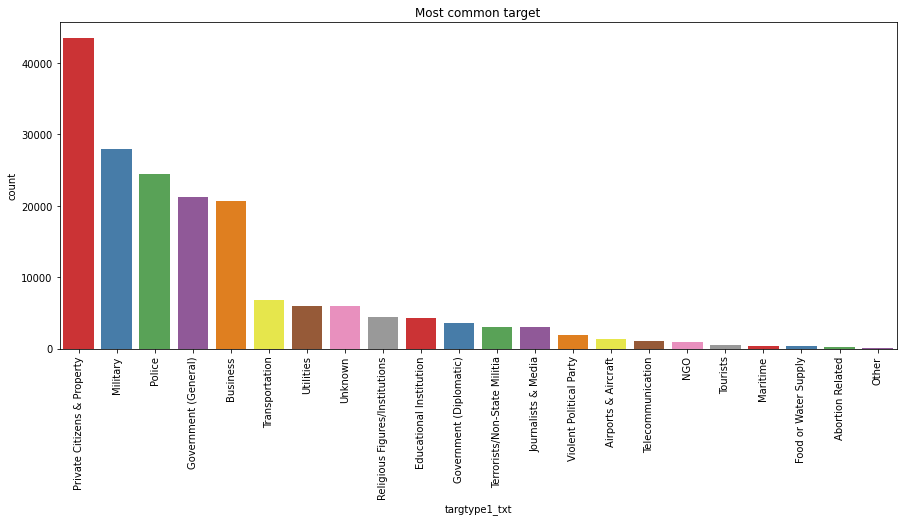

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot(global_terrorism_data['targtype1_txt'],palette='Set1',order=global_terrorism_data['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Most common target')
plt.show()

#**SUMMARY**

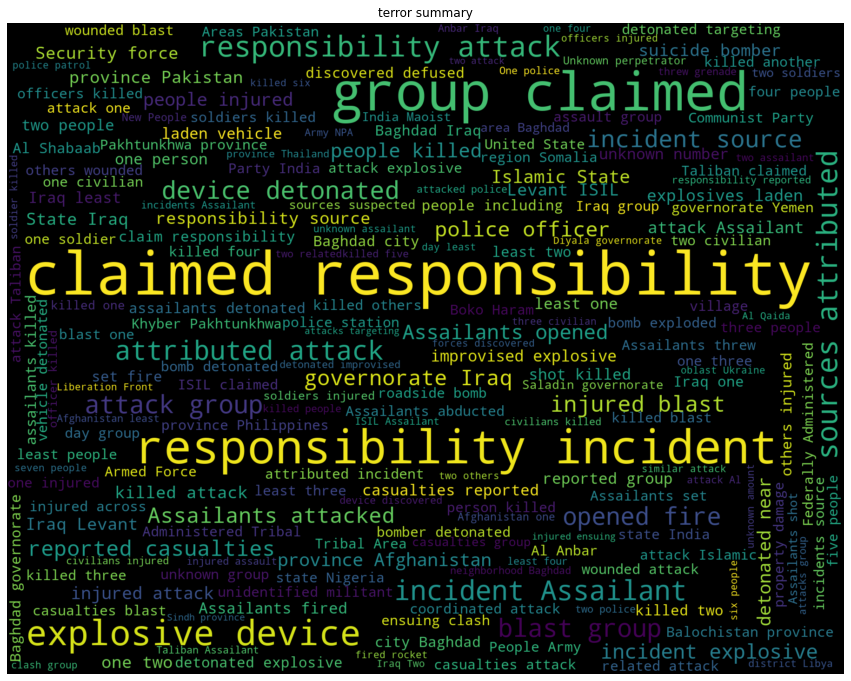

In [24]:

data_city = global_terrorism_data.summary.copy()
cities =  global_terrorism_data.summary.dropna(False)
plt.subplots(figsize=(15,15))

wordcloud = WordCloud(background_color = 'black', 
                     stopwords=STOPWORDS,
                     width=1800,
                     height=1400
                     ).generate(' '.join(cities))

plt.title('terror summary')
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()
